In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
# Load training and testing datasets
train_df = pd.read_csv('/content/drive/MyDrive/dataset/fraudTrain.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv')


In [ ]:
# Check basic info
train_df.info()
test_df.info()

# See sample data
train_df.head()

# Check for missing values
train_df.isnull().sum()

# Check target distribution
train_df['is_fraud'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,count
is_fraud,
0,1289169
1,7506


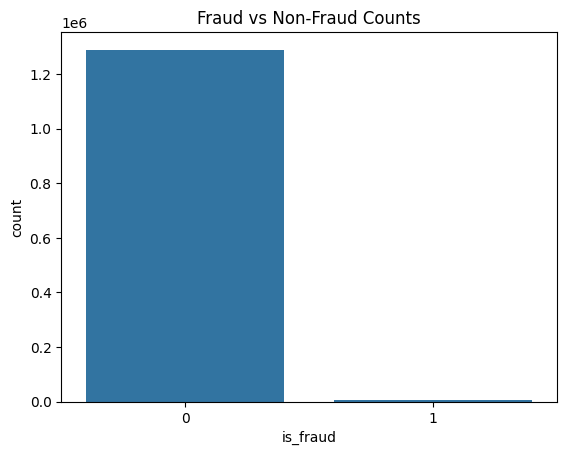

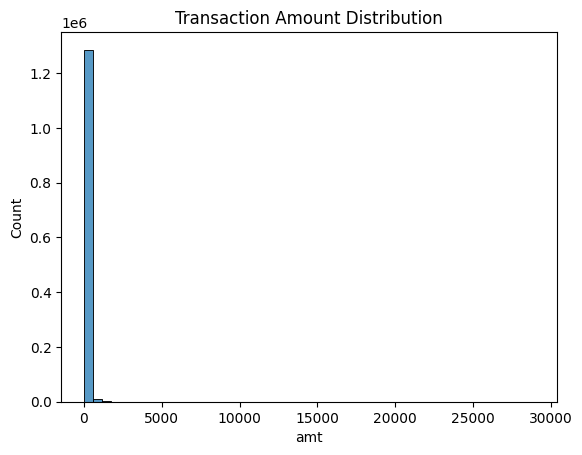

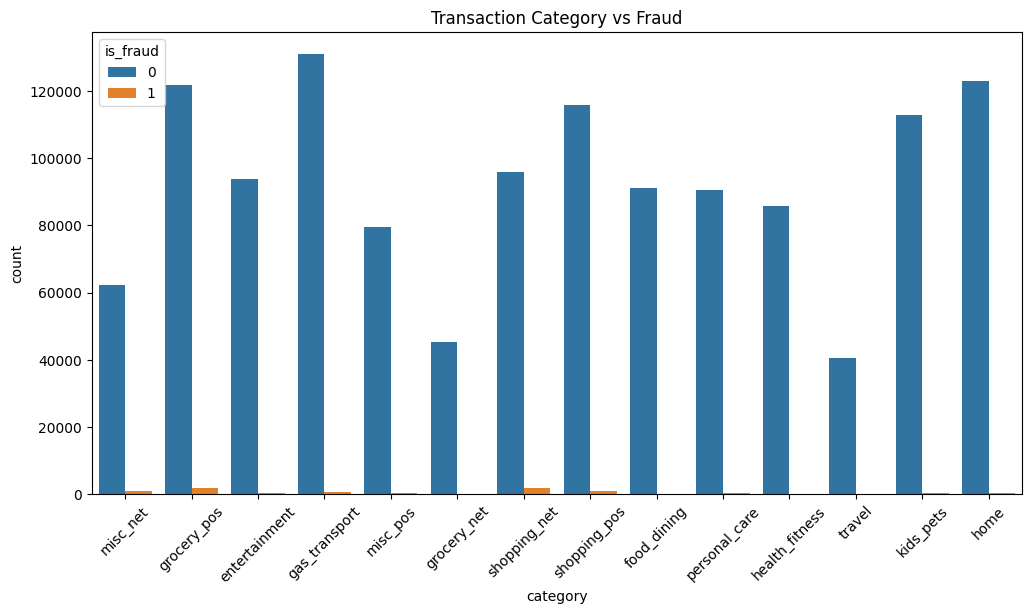

In [ ]:
# Fraud vs Non-Fraud counts
sns.countplot(data=train_df, x='is_fraud')
plt.title('Fraud vs Non-Fraud Counts')
plt.show()

# Distribution of transaction amounts
sns.histplot(train_df['amt'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

# Category vs Fraud rate
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x='category', hue='is_fraud')
plt.xticks(rotation=45)
plt.title('Transaction Category vs Fraud')
plt.show()


In [ ]:
drop_columns = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street',
                'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time']

train_df = train_df.drop(columns=drop_columns)
test_df = test_df.drop(columns=drop_columns)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit-transform train, transform test
X_train_cat = ohe.fit_transform(train_df[['category']])
X_test_cat = ohe.transform(test_df[['category']])

# The output is an array; you can merge it back if needed


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure both train and test 'category' columns are string type
train_df['category'] = train_df['category'].astype(str)
test_df['category'] = test_df['category'].astype(str)

# Combine 'category' columns
combined_category = pd.concat([train_df['category'], test_df['category']], axis=0)

# Initialize LabelEncoder
le_category = LabelEncoder()

# Fit on combined categories
le_category.fit(combined_category)

# Transform separately
train_df['category'] = le_category.transform(train_df['category'])
test_df['category'] = le_category.transform(test_df['category'])

# Similarly for 'gender'
train_df['gender'] = train_df['gender'].astype(str)
test_df['gender'] = test_df['gender'].astype(str)

combined_gender = pd.concat([train_df['gender'], test_df['gender']], axis=0)

le_gender = LabelEncoder()
le_gender.fit(combined_gender)

train_df['gender'] = le_gender.transform(train_df['gender'])
test_df['gender'] = le_gender.transform(test_df['gender'])


In [ ]:
scaler = StandardScaler()

train_df['amt'] = scaler.fit_transform(train_df[['amt']])
test_df['amt'] = scaler.transform(test_df[['amt']])


In [ ]:
# X = features (all columns except 'is_fraud')
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']


In [ ]:
# List of columns we want to drop
drop_columns = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last',
                'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time', 'job']

# Drop columns safely with errors='ignore'
train_df = train_df.drop(columns=drop_columns, errors='ignore')
test_df = test_df.drop(columns=drop_columns, errors='ignore')


In [ ]:
# Find columns that are not numeric
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['job'], dtype='object')


In [ ]:
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)


In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Find non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns to drop:", non_numeric_cols)

# Drop non-numeric columns
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)

# Train model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

print("Model training completed successfully!")

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Non-numeric columns to drop: Index([], dtype='object')
Model training completed successfully!
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# --- Model Testing Zone ---

# 1. Predict on the test set
y_pred = model.predict(X_test)

# 2. Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# 3. Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Step 1: Train model first
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 2: Prepare your sample
sample = pd.DataFrame({
    'amt': [500.0],
    'category': ['shopping_pos'],
    'gender': ['F'],
    'lat': [45.123],
    'long': [-93.123],
    # + all other necessary features
})

# Step 3: Apply the SAME preprocessing you applied to X_train
# (like label encoding, scaling)

# Step 4: Predict
prediction = model.predict(sample)


In [ ]:
import joblib

# Suppose your model variable is called 'model'
joblib.dump(model, 'creditcard_fraud_model.pkl')


['creditcard_fraud_model.pkl']

In [ ]:
from google.colab import files
files.download('creditcard_fraud_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

testing of model


In [1]:
!pip install seaborn


In [9]:
import pickle

# Load the model
with open('/content/drive/MyDrive/dataset/creditcard_fraud_model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [10]:
import pickle

# Load your saved model
with open('/content/drive/MyDrive/dataset/creditcard_fraud_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [11]:
import pandas as pd

# Load test dataset
X_test = pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv')  # <-- Replace with your actual file path
y_test = pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv')  # <-- Replace with your actual file path


In [18]:
# Step 0: Import Libraries
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier  # You can change to any model
from sklearn.model_selection import train_test_split

# Step 1: Load your Dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv')  # or your training data

# Step 2: Preprocessing
label_column = 'is_fraud'

# Drop 'Unnamed: 0' if exists
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Separate Features and Labels
X = data.drop(label_column, axis=1)
y = data[label_column]

# Drop non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
X = X.drop(columns=non_numeric_cols)

# Step 3: Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Save the Model Correctly
with open('/content/drive/MyDrive/dataset/creditcard_fraud_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model trained and saved successfully!")


✅ Model trained and saved successfully!


✅ Model loaded successfully!

Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

📋 Available Columns in Test Data:
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

🧹 Dropped 'Unnamed: 0' column!

🧹 Dropping non-numeric columns: ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

✅ Prediction completed!

📈 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.98      0.90      0.94      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.95      0.97    555719
weighted avg       1.00      1.00      1.00    5

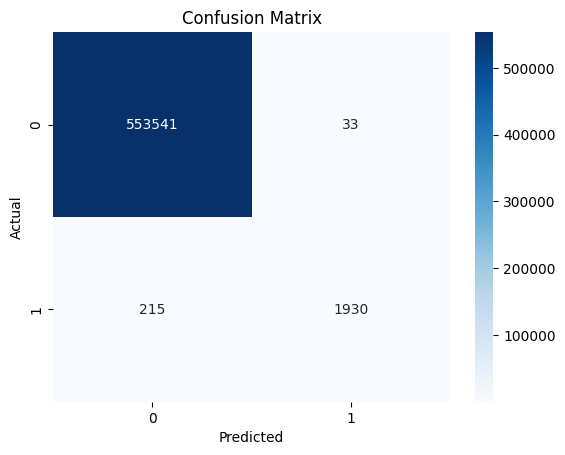

In [19]:
# Step 0: Import Libraries
import pandas as pd
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your trained model properly
with open('/content/drive/MyDrive/dataset/creditcard_fraud_model.pkl', 'rb') as file:
    model = pickle.load(file)

print("✅ Model loaded successfully!")

# Confirm model type
print("\nModel Type:", type(model))

# Step 2: Load your Test Data
data = pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv')  # <<< same dataset or another test dataset

# Step 3: Check Columns
print("\n📋 Available Columns in Test Data:")
print(data.columns)

# Step 4: Preprocessing
label_column = 'is_fraud'

# Drop 'Unnamed: 0' if exists
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)
    print("\n🧹 Dropped 'Unnamed: 0' column!")

# Separate Features and Labels
X_test = data.drop(label_column, axis=1)
y_test = data[label_column]

# Drop non-numeric columns
non_numeric_cols = X_test.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("\n🧹 Dropping non-numeric columns:", list(non_numeric_cols))
    X_test = X_test.drop(columns=non_numeric_cols)
else:
    print("\n✅ No non-numeric columns to drop.")

# Step 5: Predict using model
y_pred = model.predict(X_test)

print("\n✅ Prediction completed!")

# Step 6: Evaluation
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


✅ Model loaded successfully!

Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

🧹 Dropped 'Unnamed: 0' column!

🧹 Dropping non-numeric columns: ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

✅ Prediction completed!

📈 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.98      0.90      0.94      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.95      0.97    555719
weighted avg       1.00      1.00      1.00    555719



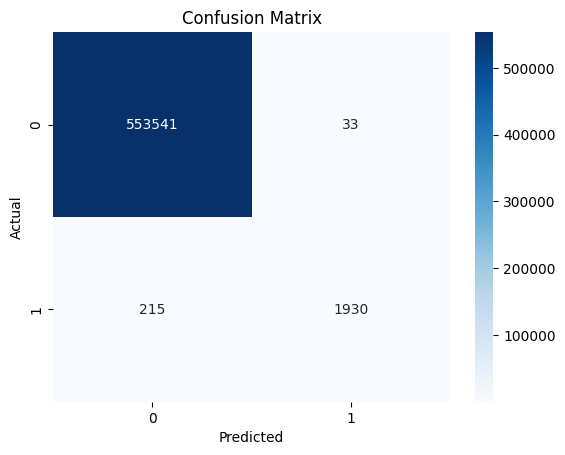

In [20]:
# Step 0: Import Libraries
import pandas as pd
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your trained model
with open('/content/drive/MyDrive/dataset/creditcard_fraud_model.pkl', 'rb') as file:
    model = pickle.load(file)

print("✅ Model loaded successfully!")
print("\nModel Type:", type(model))

# Step 2: Load your Test Data
data = pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv')

# Step 3: Preprocessing
label_column = 'is_fraud'

# Drop 'Unnamed: 0' if exists
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)
    print("\n🧹 Dropped 'Unnamed: 0' column!")

# Separate Features and Labels
X_test = data.drop(label_column, axis=1)
y_test = data[label_column]

# Drop non-numeric columns (object type) if necessary
non_numeric_cols = X_test.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("\n🧹 Dropping non-numeric columns:", list(non_numeric_cols))
    X_test = X_test.drop(columns=non_numeric_cols)
else:
    print("\n✅ No non-numeric columns to drop.")

# Step 4: Predict
y_pred = model.predict(X_test)

print("\n✅ Prediction completed!")

# Step 5: Evaluation
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
import joblib

# Suppose your model variable is called 'model'
joblib.dump(model, 'creditcard_fraud_model.pkl')


['creditcard_fraud_model.pkl']

In [22]:
from google.colab import files
files.download('creditcard_fraud_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>